In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path ='/content/drive/MyDrive/Play Store Data (1).csv'

In [ ]:
pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10841, 13)

In [ ]:
duplicate = df.duplicated().value_counts()
duplicate

False    10358
True       483
Name: count, dtype: int64

Text(0.5, 1.0, 'Duplicated Value')

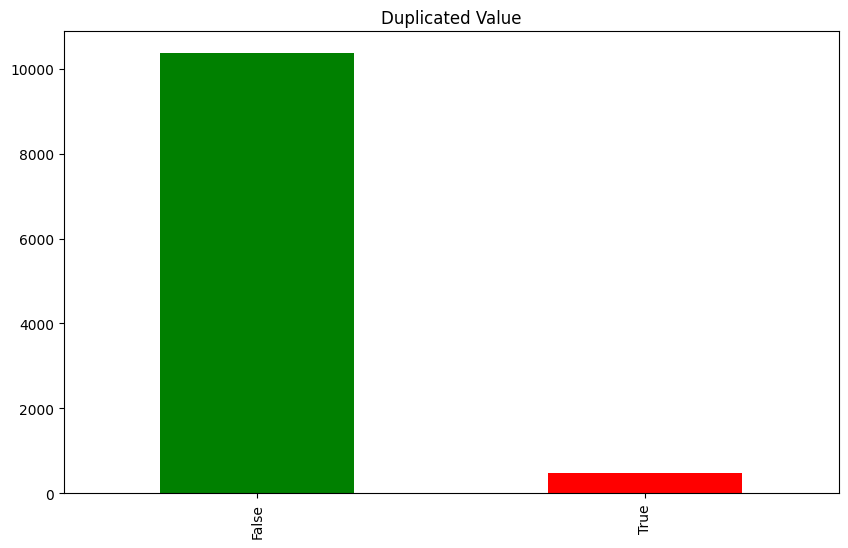

In [ ]:
plt.figure(figsize =(10,6))
duplicate.plot(kind='bar',color =['g','r'])
plt.title("Duplicated Value")

In [ ]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    10358
Name: count, dtype: int64

In [ ]:
null =df.isnull().sum()

In [ ]:
null

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Text(0, 0.5, 'places of missing values')

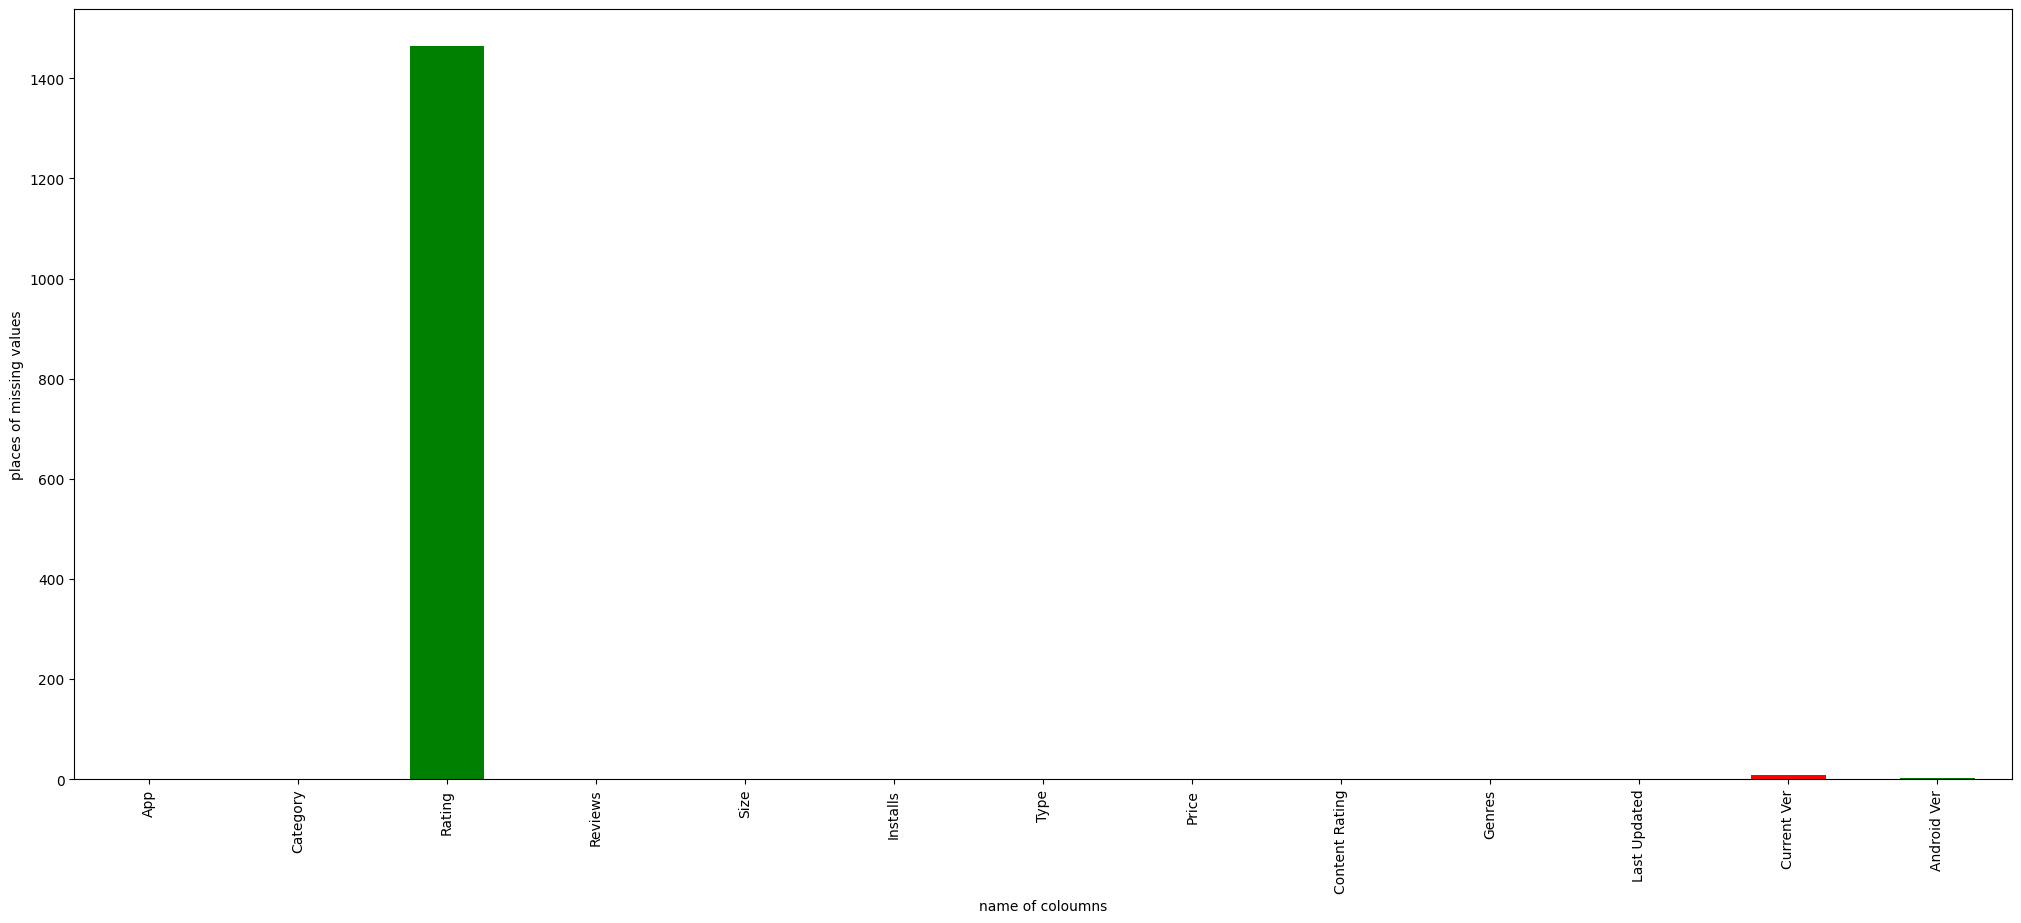

In [ ]:
plt.figure(figsize =(25,10))
null.plot(kind ='bar', color= ['g','r'])
plt.xlabel('name of coloumns')
plt.ylabel("places of missing values")

In [ ]:
print(df.apply(lambda col: col.unique()))

App               [Photo Editor & Candy Camera & Grid & ScrapBoo...
Category          [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...
Rating            [4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...
Reviews           [159, 967, 87510, 215644, 167, 178, 36815, 137...
Size              [19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....
Installs          [10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...
Type                                           [Free, Paid, nan, 0]
Price             [0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...
Content Rating    [Everyone, Teen, Everyone 10+, Mature 17+, Adu...
Genres            [Art & Design, Art & Design;Pretend Play, Art ...
Last Updated      [January 7, 2018, January 15, 2018, August 1, ...
Current Ver       [1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1,...
Android Ver       [4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and...
dtype: object


In [ ]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
0          1
Name: count, dtype: int64

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df['Rating'].isnull().sum()

1465

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
mean_rating = df['Rating'].mean()
median_rating =df['Rating'].median()
round(mean_rating,1), round(median_rating,1)

(4.2, 4.3)

<Axes: ylabel='Rating'>

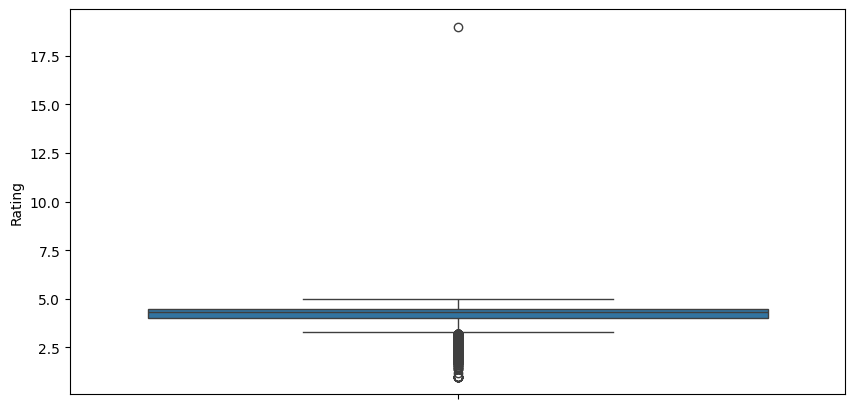

In [ ]:
plt.figure(figsize =(10,5))
sns.boxplot(df['Rating'])

In [ ]:
df['Rating'].replace(np.nan, df['Rating'].median(), inplace=True)
df['Rating'].isnull().sum()

0

In [ ]:
df['Rating'].sort_values(ascending=False).head(5)

10472    19.0
6727      5.0
6055      5.0
9089      5.0
6043      5.0
Name: Rating, dtype: float64

In [ ]:
df =df.drop(10472)

In [ ]:
df.shape

(10358, 13)

<Axes: ylabel='Rating'>

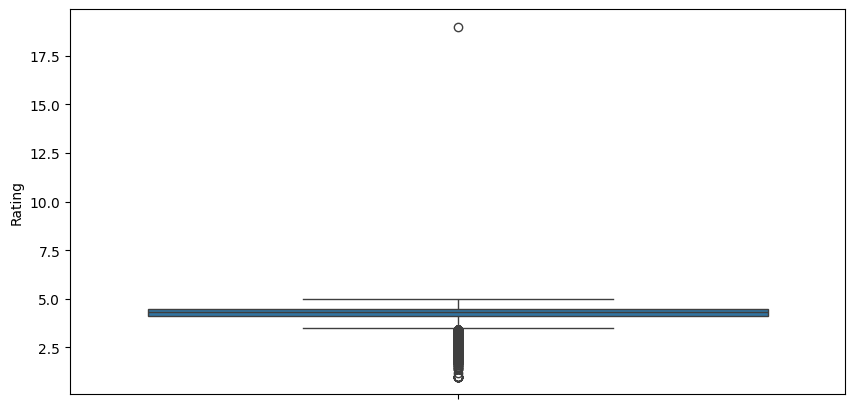

In [ ]:
plt.figure(figsize =(10,5))
sns.boxplot(df['Rating'])

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
df['Current Ver'].replace(np.nan,'varies with device',inplace = True)
df['Android Ver'].replace(np.nan ,'Varies with device',inplace = True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df['Type'].replace(np.nan ,'free',inplace= True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
df['Content Rating'].isnull().sum()

0

In [ ]:
df['Content Rating'].replace(np.nan,'everyone',inplace =True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df['Last Updated'] = df['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  object        
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
df['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: count, dtype: int64

In [ ]:
df['Installs']= df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace("+",'')
df['Installs'].value_counts()

Installs
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: count, dtype: int64

In [ ]:
df['Installs'].value_counts()

Installs
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: count, dtype: int64

In [ ]:
df['Installs'] =df['Installs'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
df['Reviews'] = df['Reviews'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
def kb_to_mb(val):
  try:
    if 'M' in val:
      return float( val[:-1])
    elif 'k' in val :
      return round(float(val[:-1])/1024,2)
    else :
      return val
  except :
    return val


In [ ]:
df['Size'] = df['Size'].apply(lambda x : kb_to_mb(x))
df['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: object

In [ ]:
df['Size'].value_counts()

Size
Varies with device    1526
11.0                   188
13.0                   186
12.0                   186
14.0                   182
                      ... 
0.48                     1
0.1                      1
0.56                     1
0.75                     1
0.66                     1
Name: count, Length: 274, dtype: int64

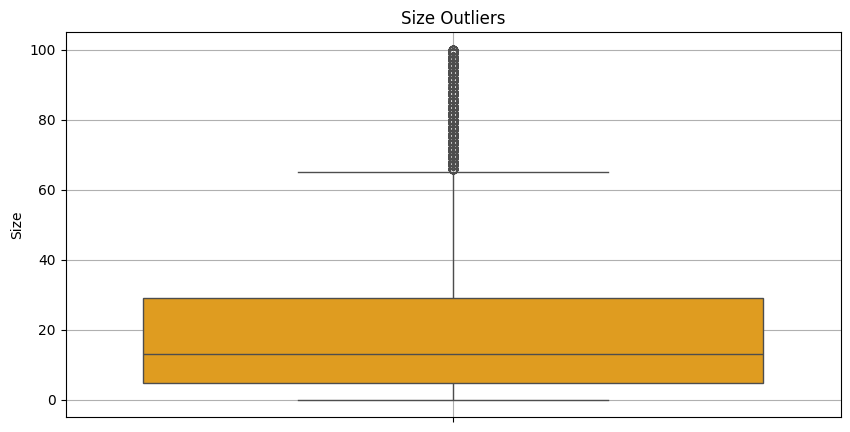

In [ ]:
size_new = df[df['Size'] != 'Varies with device']['Size']
plt.figure(figsize =(10,5))
sns.boxplot( size_new ,color ='orange')
plt.title("Size Outliers")
plt.grid()

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].str.replace('$','')

In [ ]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe().style.background_gradient()

,Rating,Reviews,Installs,Price,Last Updated
count,10357.000000,10357.000000,10357.000000,10357.000000,10357
mean,4.203737,405904.610602,14157759.440668,1.030800,2017-11-14 09:25:19.320266496
min,1.000000,0.000000,0.000000,0.000000,2010-05-21 00:00:00
25%,4.100000,32.000000,1000.000000,0.000000,2017-09-03 00:00:00
50%,4.300000,1680.000000,100000.000000,0.000000,2018-05-20 00:00:00
75%,4.500000,46416.000000,1000000.000000,0.000000,2018-07-19 00:00:00
max,5.000000,78158306.000000,1000000000.000000,400.000000,2018-08-08 00:00:00
std,0.485594,2696777.836748,80239553.869019,16.278625,nan


1.**WHICH CATEGORY IS MOST PREFFERED BY PEOPLE ?**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

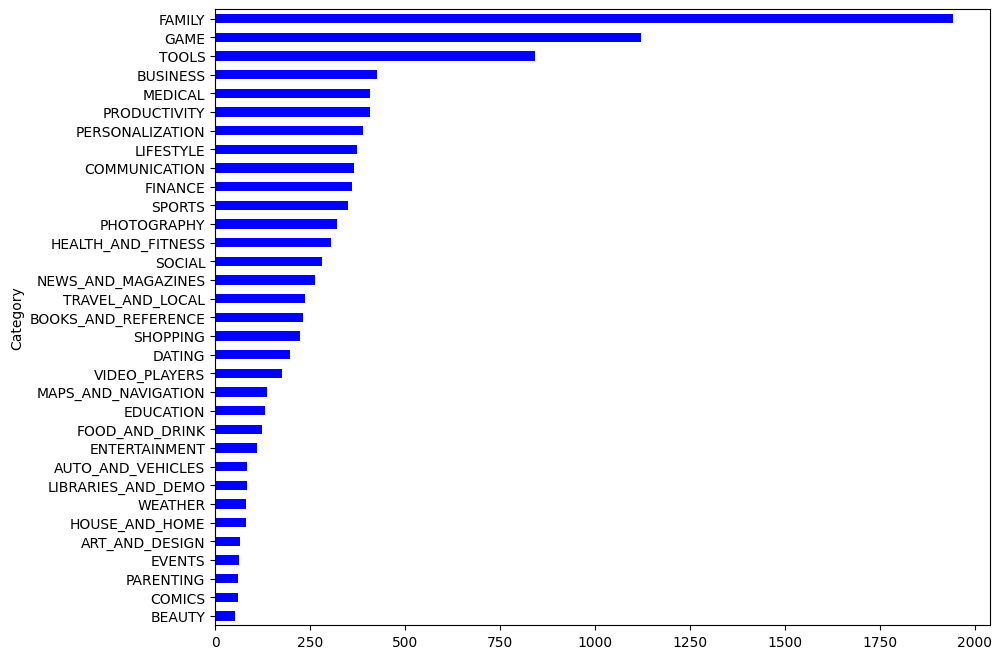

In [ ]:
plt.figure(figsize =(10,8))
df['Category'].value_counts().plot(kind='barh',color ='blue').invert_yaxis()

**Obsevation**

*  Looks like people like Family Category for downloading the app. List item




2.**What is overall rating for an app ?**

In [ ]:
df['Rating'].value_counts()

Rating
4.3    2481
4.4    1032
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Rating')

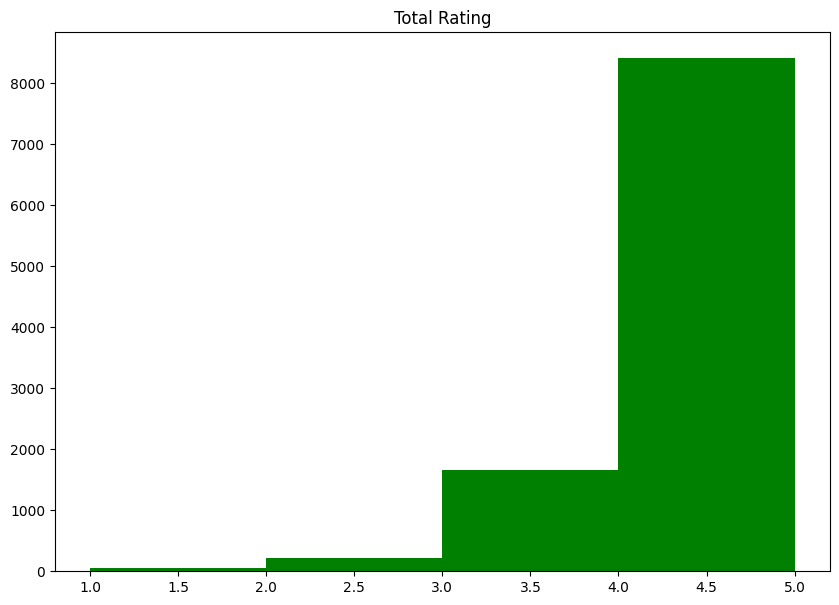

In [ ]:
fig,ax =plt.subplots(figsize =(10,7))
ax.hist(df['Rating'],bins =[1,2,3,4,5],color ='green')
plt.title('Total Rating')


**Observation**

*  Almost most than 80 % of the app in playstore between the range of 4-5.



3. How many installation happened ?


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df['Installs'].value_counts().reset_index()

,Installs,count
0,1000000,1488
1,10000000,1132
2,100000,1129
3,10000,1033
4,1000,890
5,100,710
6,5000000,683
7,500000,517
8,50000,474
9,5000,469


Text(0.5, 0, 'install')

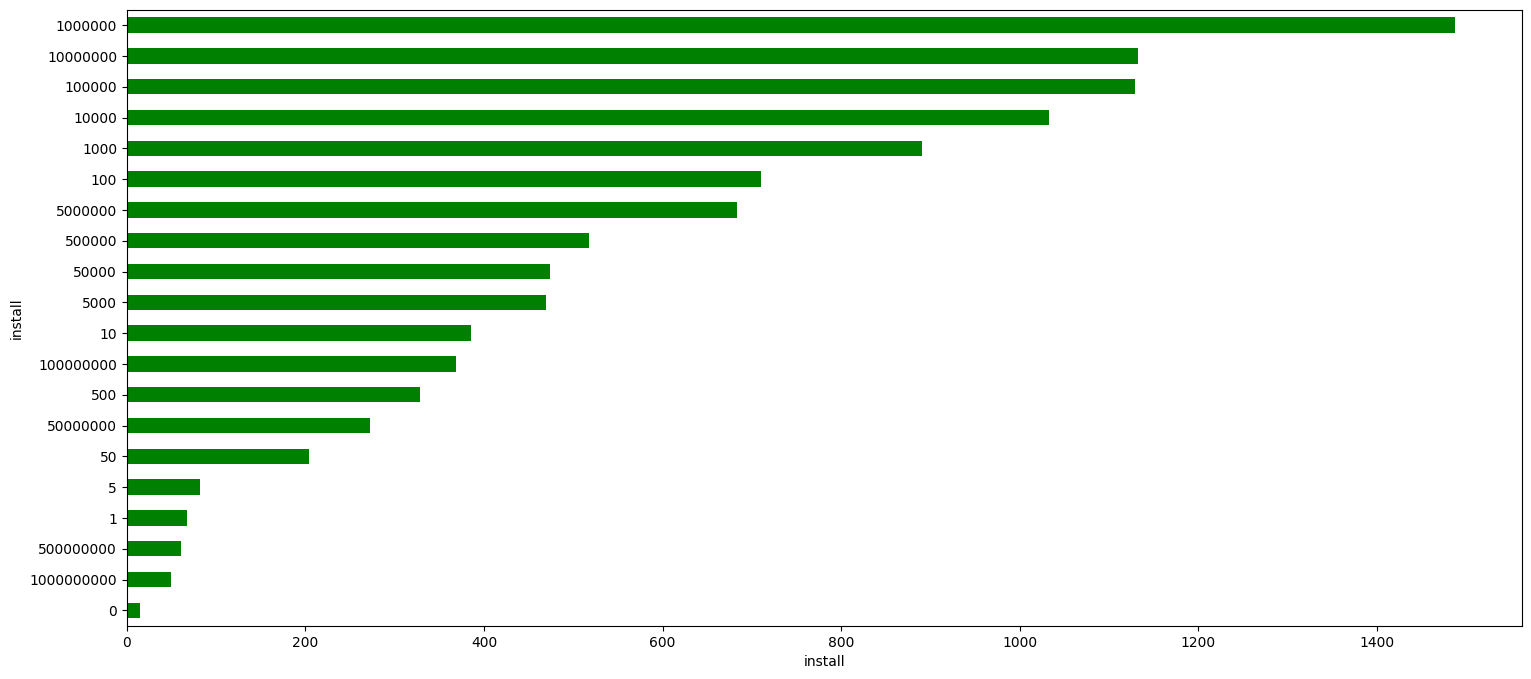

In [ ]:
plt.figure(figsize =(18,8))
df['Installs'].value_counts().plot(kind='barh',color ='green').invert_yaxis()
plt.ylabel('install')
plt.xlabel('install')

**Observations**

1.   there are 1488 apps with than 10,00,000 downloads install.





**FIND TOP FREE APPS**

In [ ]:
free_apps =df[df['Type']=='Free']
free_apps['Type'].value_counts()

Type
Free    9591
Name: count, dtype: int64

In [ ]:
top_free_apps = free_apps[free_apps['Installs']== free_apps['Installs'].max()]
top_free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device


In [ ]:
top_free_apps['Category'].value_counts()

Category
COMMUNICATION          14
SOCIAL                  7
GAME                    5
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
PRODUCTIVITY            3
VIDEO_PLAYERS           3
NEWS_AND_MAGAZINES      3
TOOLS                   2
BOOKS_AND_REFERENCE     1
ENTERTAINMENT           1
FAMILY                  1
Name: count, dtype: int64

Text(0.5, 0, 'install')

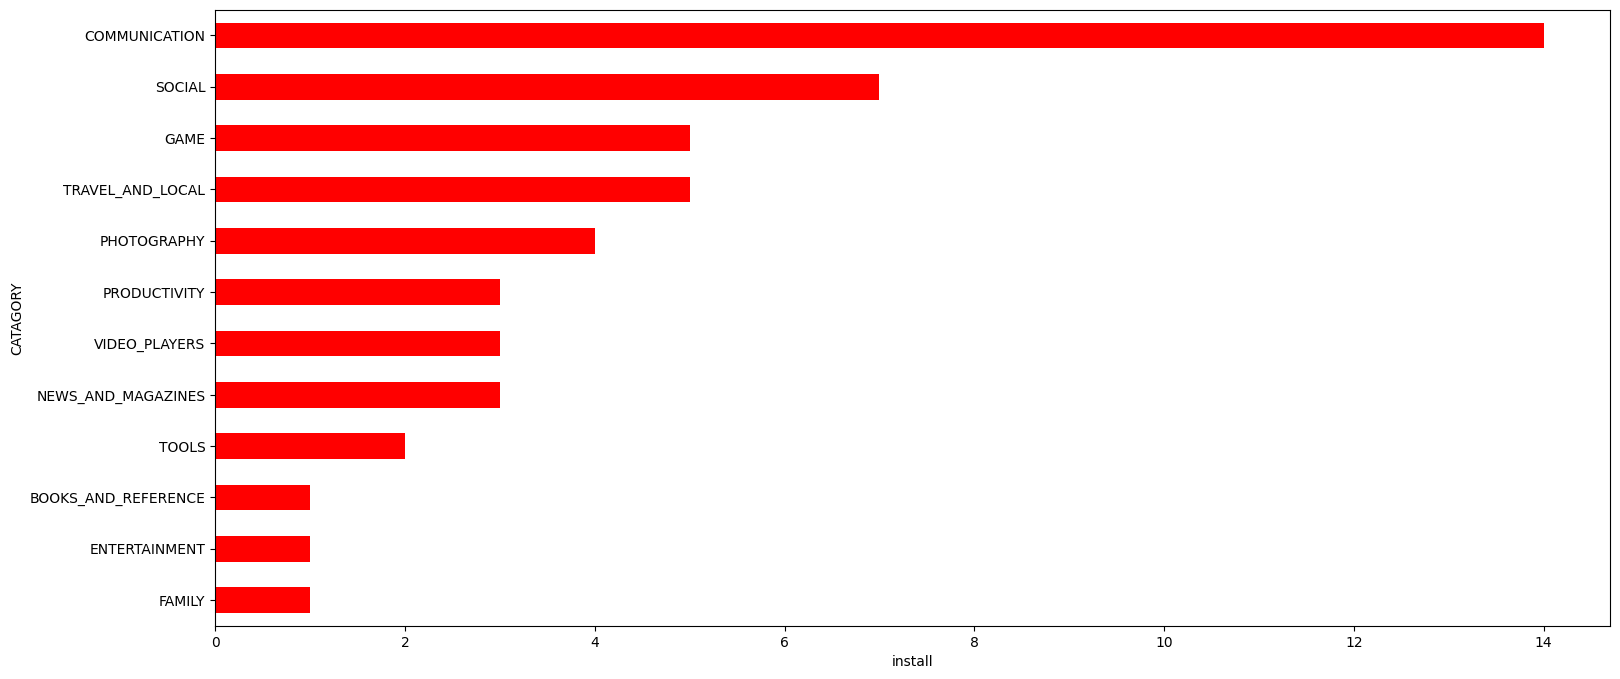

In [ ]:
plt.figure(figsize=( 18,8))
top_free_apps['Category'].value_counts().plot(kind='barh',color ='red').invert_yaxis()
plt.ylabel('CATAGORY')
plt.xlabel('install')



**Observation**

*   communication is the category which has lot of interest of when it comes to free apps.
*  Followed by the social category apps
.



---



**FIND TOP PAID APPS .**

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
Paid_apps = df[df['Type'] == 'paid']
Paid_apps['Type'].value_counts()

Series([], Name: count, dtype: int64)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**CONTENT RATING**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating'>

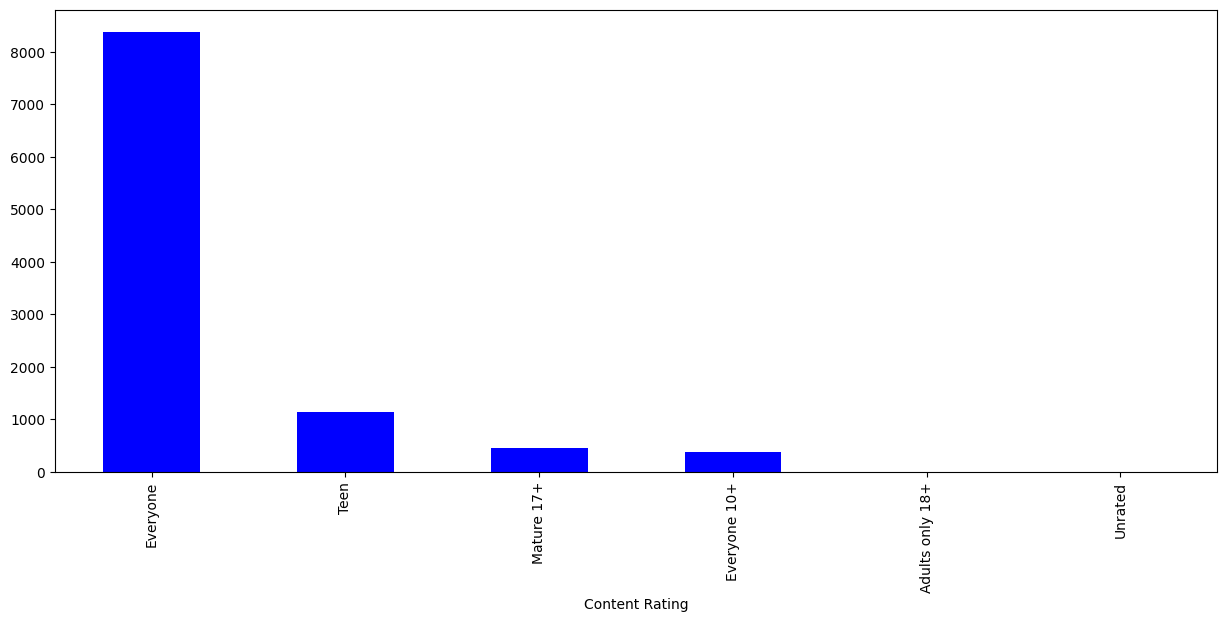

In [ ]:
plt.figure(figsize =(15,6))
df['Content Rating'].value_counts().plot(kind ='bar',color ='blue')

**Observation**

*   its looks like most of the apps are made for everyone and the real source of income for them is Ads



**GENRES**

In [ ]:
df['Genres'].value_counts()

Genres
Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

Text(0.5, 1.0, 'Genres')

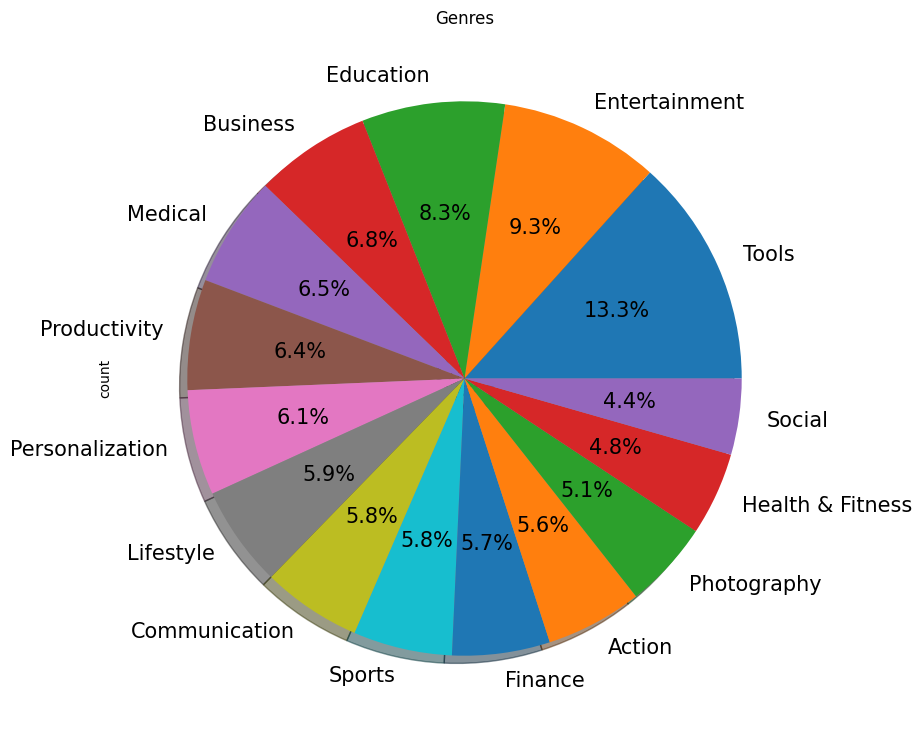

In [ ]:
textprops ={"fontsize": 15}
plt.figure(figsize =(9,9))
df['Genres'].value_counts().iloc[:15].plot(kind ='pie',shadow= True,autopct= '%1.1f%%',textprops= textprops)
plt.title('Genres')

**OBSERVATION**


*  looks like the most liked Genres is Tools but other than that every app has weightage of likings



**EXPLORING USER REVIEW DATA**

LOADING THE DATASET

In [ ]:
path2 ='/content/drive/MyDrive/User Reviews.csv'

In [ ]:
DF =pd.read_csv(path2)

In [ ]:
DF.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
DF.shape

(64295, 5)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
DF.isnull().value_counts()

App    Translated_Review  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
False  False              False      False               False                     37427
       True               True       True                True                      26863
                          False      False               False                         5
Name: count, dtype: int64

In [ ]:
dup = DF.duplicated().value_counts()

<Axes: >

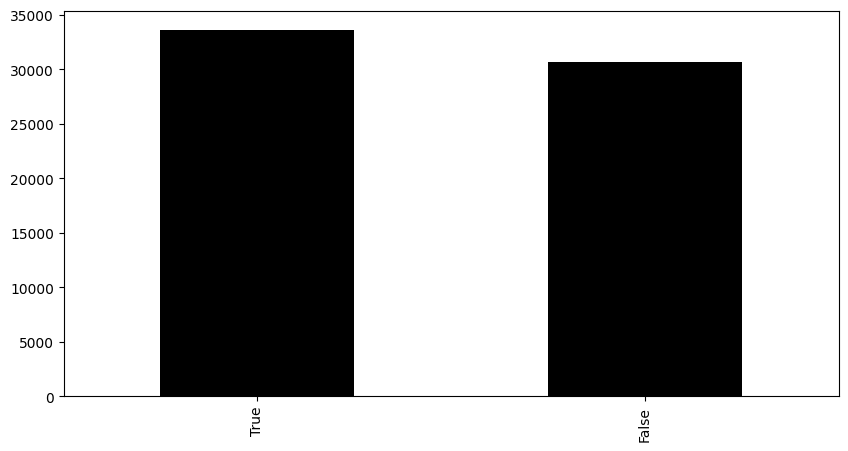

In [ ]:
plt.figure(figsize =(10,5))
dup.plot(kind='bar',color ='black')


In [ ]:
DF =DF.drop_duplicates()
DF.duplicated().value_counts()

False    30679
Name: count, dtype: int64

In [ ]:
DF.shape

(30679, 5)

In [ ]:
DF.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

Text(306.94444444444446, 0.5, 'palce of missing value')

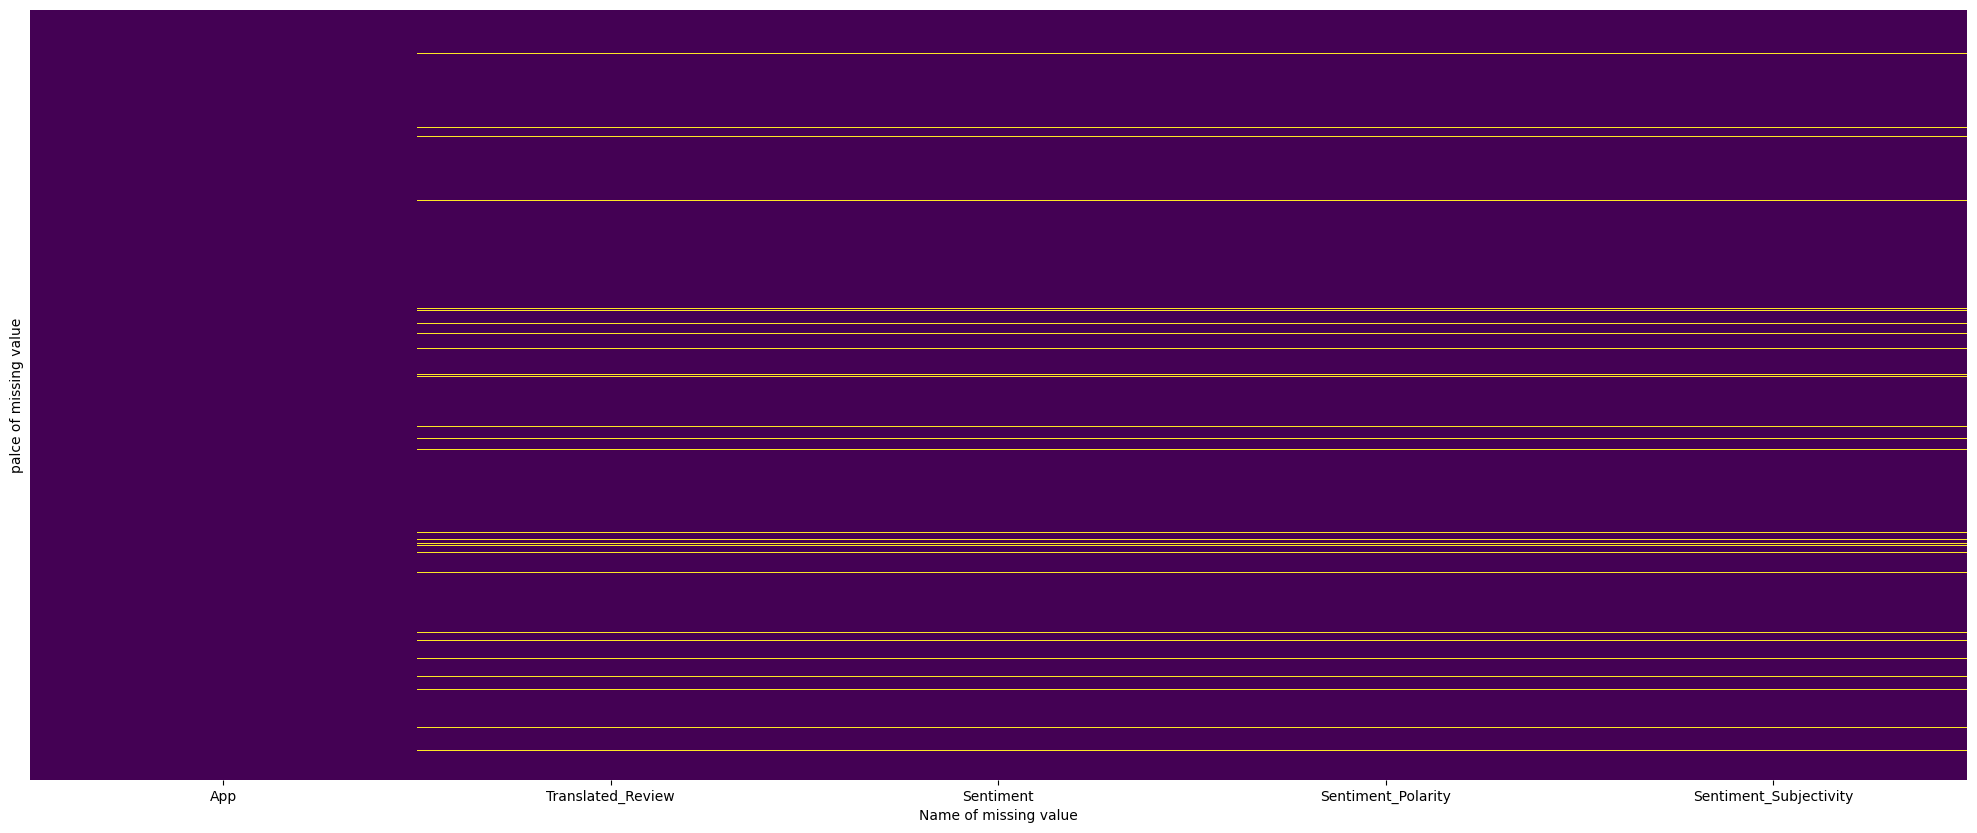

In [ ]:
plt.figure(figsize =(25,10))
sns.heatmap(DF.isnull(),cbar= False ,yticklabels=False ,cmap='viridis')
plt.xlabel("Name of missing value")
plt.ylabel("palce of missing value")

THERE ARE A LOTS OF NAN VALUES AND WE CANNOT JUST DROP IT

In [ ]:
DF[DF['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
268,11st,NaN,Neutral,0.0,0.0
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


we can say that th apps which do not have a review (NaN Value insteal) tend to have NaN values in the columns sentiment ,sentiment polarity and sentiment_subjectivity in the majority of the cases

In [ ]:
#the row corresponding to the NaN values in the  translated_review column ,where the rest of the columns are not null.
DF[DF['Translated_Review'].isnull() & DF['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [ ]:
DF =DF.dropna()

In [ ]:
DF.shape

(29692, 5)

In [ ]:
DF.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
DF.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


**Exploratory Data Analysis**

*  What are sentiment type for app ?




In [ ]:
DF['Sentiment'].value_counts()

Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64

**Observation**

*   looks like most of the app has positive respone from the user



**Top apps with sentiment**

In [ ]:
DF.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
app_sentiment= DF.groupby(['App'])['Sentiment'].value_counts().iloc[:27]
app_sentiment

App                                               Sentiment
10 Best Foods for You                             Positive     79
                                                  Neutral      11
                                                  Negative      5
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                  Positive     27
                                                  Neutral       8
                                                  Negative      1
11st                                              Positive     23
                                                  Neutral       9
                                                  Negative      7
1800 Contacts - Lens Store                        Positive     32
                                                  Neutral       5
                                                  Negative      3
1LINE – One Line with One Touch                   Positive     27
                                                  Negative      8
                

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25214 (\N{CJK UNIFIED IDEOGRAPH-627E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20860 (\N{CJK UNIFIED IDEOGRAPH-517C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

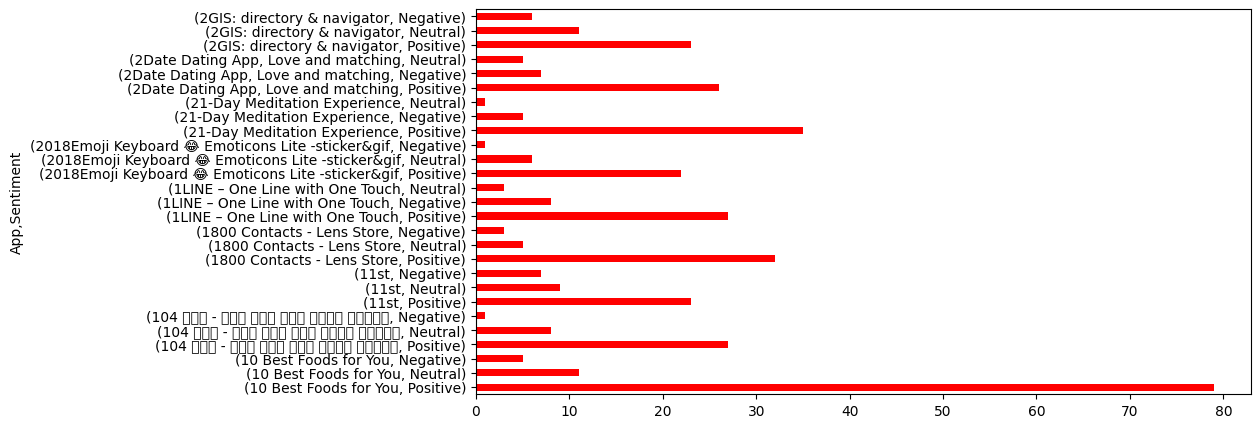

In [ ]:
plt.figure(figsize =(10,5))
app_sentiment.plot(kind ='barh',color ='red')
plt.show()

**Observation**


*   Looks like the app 10 best food for you has highest positive review



**find the top 10 postive sentiment apps**

In [ ]:
positive_sentiment = DF[DF['Sentiment']=='Positive']
positive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
top_postive_sentiment_apps = positive_sentiment.groupby('App')['Sentiment'].value_counts().nlargest(10)
top_postive_sentiment_apps

App                             Sentiment
ColorNote Notepad Notes         Positive     91
Calorie Counter - Macros        Positive     87
Family Locator - GPS Tracker    Positive     85
8fit Workouts & Meal Planner    Positive     82
Calorie Counter - MyNetDiary    Positive     82
Bible                           Positive     80
10 Best Foods for You           Positive     79
Google Photos                   Positive     76
Calorie Counter & Diet Tracker  Positive     75
Episode - Choose Your Story     Positive     74
Name: count, dtype: int64

<Axes: xlabel='App,Sentiment'>

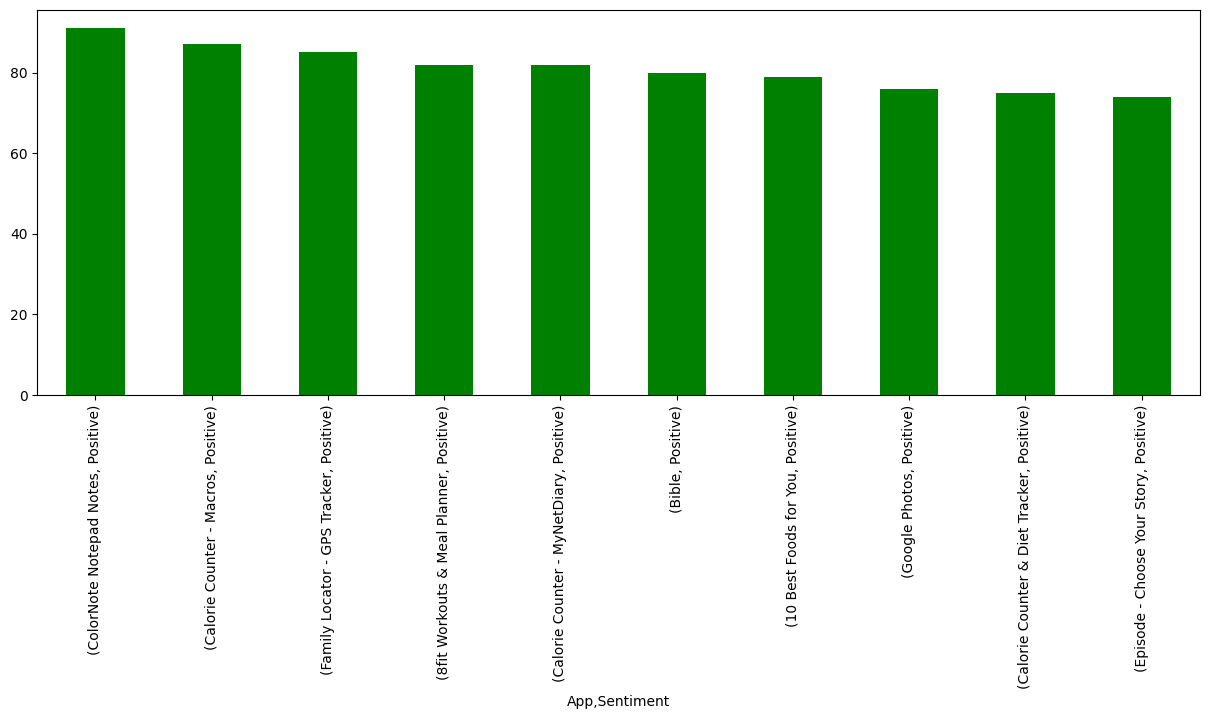

In [ ]:
plt.figure(figsize =(15,5))
top_postive_sentiment_apps.plot(kind ='bar',color ='g')